## Recupera os dados analisados e tratados, treina o modelo, fazendo a clusterização dos acidentes aeronáuticos.

In [144]:
# importa bibliotecas
import pandas as pd

from sklearn.pipeline import Pipeline # permite uma sequência de estágios a serem executados
from sklearn.cluster import KMeans # algorítmo de clusterização
from sklearn.decomposition import PCA # reduz o nro de variáveis para otimizar o algorítmo do modelo
                                      # ajuda a evitar overfiting do modelo

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter('ignore')

In [145]:
# carregando arquivo tratado em formato dataframe
df_acidentes_aero_trans = pd.read_csv('arquivos_tratados/df_acidentes_aero_trans.csv')

In [146]:
# conferindo a dimensão do dataframe, linhas e colunas
df_acidentes_aero_trans.shape

(9357, 59)

In [147]:
# ordenando pelo index o dataframe carregado
df_acidentes_aero_trans = df_acidentes_aero_trans.sort_index()

In [148]:
# criando lista de colunas originais categóricas e numéricas que participarão da clusterização
columns = [
        'ocorrencia_classificacao',
        'ocorrencia_saida_pista',
        'aeronave_tipo_veiculo',
        'aeronave_motor_tipo',
        'aeronave_motor_quantidade',
        'aeronave_tipo_operacao',
        'aeronave_nivel_dano',
        'periodo',     

        'ocorrencia_latitude',
        'ocorrencia_longitude', 

        ]

In [149]:
# carregando colunas listadas anteriormente para um novo dataframe
df_acidentes_aero = df_acidentes_aero_trans[columns]

In [150]:
# conferindo a dimensão(linhas x colunas) do dataframe de colunas originais
# temos 8 colunas categoricas e 2 colunas numericas
df_acidentes_aero.shape

(9357, 10)

In [151]:
# fazendo um reconhecimento inicial das primeiras linhas do dataframe criado com variáveis(colunas) originais
df_acidentes_aero.head(5)

,ocorrencia_classificacao,ocorrencia_saida_pista,aeronave_tipo_veiculo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_tipo_operacao,aeronave_nivel_dano,periodo,ocorrencia_latitude,ocorrencia_longitude
0,INCIDENTE,NÃO,AVIÃO,PISTÃO,BIMOTOR,PRIVADA,***,00:00 às 06:00,0.0,0.0
1,INCIDENTE,NÃO,AVIÃO,PISTÃO,MONOMOTOR,PRIVADA,NENHUM,18:00 às 00:00,0.0,0.0
2,INCIDENTE,NÃO,AVIÃO,JATO,BIMOTOR,***,***,18:00 às 00:00,0.0,0.0
3,INCIDENTE,NÃO,AVIÃO,PISTÃO,MONOMOTOR,INSTRUÇÃO,***,00:00 às 06:00,0.0,0.0
4,INCIDENTE,NÃO,AVIÃO,PISTÃO,BIMOTOR,TÁXI AÉREO,NENHUM,18:00 às 00:00,0.0,0.0


In [152]:
# cria dataframe somente com as colunas que sofreram transformação
df_acidentes_aero_trans = df_acidentes_aero_trans.drop(columns=columns, axis=1)

- Essas colunas que sofreram transformação serão as colunas utilizadas para a definição do cluster ao qual o acidente de cada linha do dataframe vai pertencer

In [153]:
# verificando o tamanho do dataframe(linhas x colunas) criado com as colunas transformadas
# temos 47 variáveis binárias categóricas e 2 variáveis numéricas que variam de 0 a 1
df_acidentes_aero_trans.shape

(9357, 49)

In [154]:
# verificando as primeiras linhas do novo dataframe
df_acidentes_aero_trans.head(5)

,one-hot__ocorrencia_classificacao_ACIDENTE,one-hot__ocorrencia_classificacao_INCIDENTE,one-hot__ocorrencia_classificacao_INCIDENTE GRAVE,one-hot__ocorrencia_saida_pista_NÃO,one-hot__ocorrencia_saida_pista_SIM,one-hot__aeronave_tipo_veiculo_***,one-hot__aeronave_tipo_veiculo_ANFÍBIO,one-hot__aeronave_tipo_veiculo_AVIÃO,one-hot__aeronave_tipo_veiculo_BALÃO,one-hot__aeronave_tipo_veiculo_DIRIGÍVEL,one-hot__aeronave_tipo_veiculo_GIROCÓPTERO,one-hot__aeronave_tipo_veiculo_HELICÓPTERO,one-hot__aeronave_tipo_veiculo_HIDROAVIÃO,one-hot__aeronave_tipo_veiculo_PLANADOR,one-hot__aeronave_tipo_veiculo_TRIKE,one-hot__aeronave_tipo_veiculo_ULTRALEVE,one-hot__aeronave_motor_tipo_***,one-hot__aeronave_motor_tipo_JATO,one-hot__aeronave_motor_tipo_PISTÃO,one-hot__aeronave_motor_tipo_SEM TRAÇÃO,one-hot__aeronave_motor_tipo_TURBOEIXO,one-hot__aeronave_motor_tipo_TURBOÉLICE,one-hot__aeronave_motor_quantidade_***,one-hot__aeronave_motor_quantidade_BIMOTOR,one-hot__aeronave_motor_quantidade_MONOMOTOR,one-hot__aeronave_motor_quantidade_QUADRIMOTOR,one-hot__aeronave_motor_quantidade_SEM TRAÇÃO,one-hot__aeronave_motor_quantidade_TRIMOTOR,one-hot__aeronave_tipo_operacao_***,one-hot__aeronave_tipo_operacao_AGRÍCOLA,one-hot__aeronave_tipo_operacao_ESPECIALIZADA,one-hot__aeronave_tipo_operacao_EXPERIMENTAL,one-hot__aeronave_tipo_operacao_INSTRUÇÃO,one-hot__aeronave_tipo_operacao_NÃO REGULAR,one-hot__aeronave_tipo_operacao_POLICIAL,one-hot__aeronave_tipo_operacao_PRIVADA,one-hot__aeronave_tipo_operacao_REGULAR,one-hot__aeronave_tipo_operacao_TÁXI AÉREO,one-hot__aeronave_nivel_dano_***,one-hot__aeronave_nivel_dano_DESTRUÍDA,one-hot__aeronave_nivel_dano_LEVE,one-hot__aeronave_nivel_dano_NENHUM,one-hot__aeronave_nivel_dano_SUBSTANCIAL,one-hot__periodo_00:00 às 06:00,one-hot__periodo_06:00 às 12:00,one-hot__periodo_12:00 às 18:00,one-hot__periodo_18:00 às 00:00,minmax__ocorrencia_latitude,minmax__ocorrencia_longitude
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.528177,0.537901
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.528177,0.537901
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.528177,0.537901
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.528177,0.537901
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.528177,0.537901


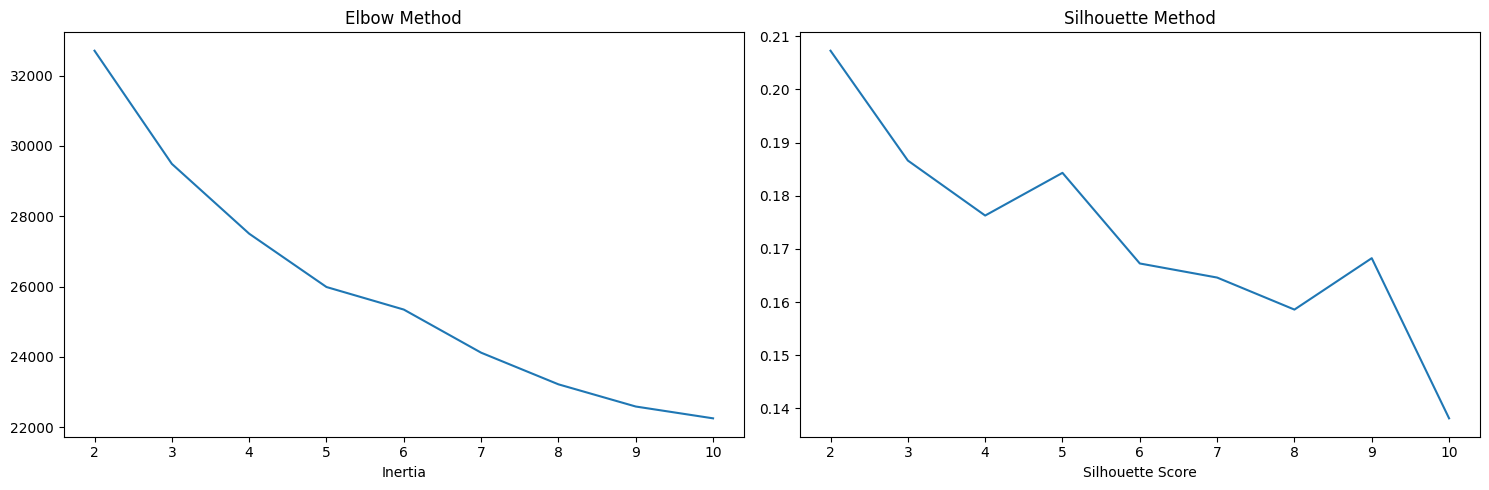

In [155]:
# gera os gráficos para definir a quantidade de clusters a serem gerados usando os métodos
# do COTOVELO e da SILHUETA - aqui definido que o melhor tamanho de cluster será de 3
from auxiliary_functions import plot_elbow_silhouette

plot_elbow_silhouette(df_acidentes_aero_trans)

- Pelo método do cotovelo e da silhueta verificamos que existe em comum um cotovelo na posição 3 em ambos os gráficos, sendo essa a quantidade escolhida para a formação dos clusters

In [156]:
# definindo o pipeline com pca e kmeans e gerando os clusters do modelo
RANDOM_STATE = 42

pipeline = Pipeline(
    [
        ("pca", PCA(n_components=2, random_state=RANDOM_STATE)), # reduz o nro de variáveis para otimizar o algorítmo do modelo
                                                                 # ajuda a evitar overfiting do modelo
                                                                 # n_components=2 nro de componentes que serão mantidos
        ("clustering", KMeans(n_clusters=3, random_state=RANDOM_STATE, n_init=10))
                                                                 # clusteriza os acidentes aéreos
                                                                 # n_cluster=3 qtde de clusters que serão criados
                                                                 # n_init=10 nro de vezes de execução com diferentes combinações
                                                                 # do centróide

                                                                 # random_state nro da instância gerada e conservada
    ]
)

kmeans_cenipa = pipeline.fit(df_acidentes_aero_trans) # faz o treinamento do modelo e já cria os clusters

In [157]:
kmeans_cenipa

Pipeline(steps=[('pca', PCA(n_components=2, random_state=42)),
                ('clustering',
                 KMeans(n_clusters=3, n_init=10, random_state=42))])

In [158]:
pipeline["clustering"].labels_

array([2, 2, 1, ..., 1, 0, 1])

In [159]:
df_clustered = df_acidentes_aero_trans.copy()
df_clustered["cluster"] = pipeline["clustering"].labels_

df_clustered.head()

,one-hot__ocorrencia_classificacao_ACIDENTE,one-hot__ocorrencia_classificacao_INCIDENTE,one-hot__ocorrencia_classificacao_INCIDENTE GRAVE,one-hot__ocorrencia_saida_pista_NÃO,one-hot__ocorrencia_saida_pista_SIM,one-hot__aeronave_tipo_veiculo_***,one-hot__aeronave_tipo_veiculo_ANFÍBIO,one-hot__aeronave_tipo_veiculo_AVIÃO,one-hot__aeronave_tipo_veiculo_BALÃO,one-hot__aeronave_tipo_veiculo_DIRIGÍVEL,one-hot__aeronave_tipo_veiculo_GIROCÓPTERO,one-hot__aeronave_tipo_veiculo_HELICÓPTERO,one-hot__aeronave_tipo_veiculo_HIDROAVIÃO,one-hot__aeronave_tipo_veiculo_PLANADOR,one-hot__aeronave_tipo_veiculo_TRIKE,one-hot__aeronave_tipo_veiculo_ULTRALEVE,one-hot__aeronave_motor_tipo_***,one-hot__aeronave_motor_tipo_JATO,one-hot__aeronave_motor_tipo_PISTÃO,one-hot__aeronave_motor_tipo_SEM TRAÇÃO,one-hot__aeronave_motor_tipo_TURBOEIXO,one-hot__aeronave_motor_tipo_TURBOÉLICE,one-hot__aeronave_motor_quantidade_***,one-hot__aeronave_motor_quantidade_BIMOTOR,one-hot__aeronave_motor_quantidade_MONOMOTOR,one-hot__aeronave_motor_quantidade_QUADRIMOTOR,one-hot__aeronave_motor_quantidade_SEM TRAÇÃO,one-hot__aeronave_motor_quantidade_TRIMOTOR,one-hot__aeronave_tipo_operacao_***,one-hot__aeronave_tipo_operacao_AGRÍCOLA,one-hot__aeronave_tipo_operacao_ESPECIALIZADA,one-hot__aeronave_tipo_operacao_EXPERIMENTAL,one-hot__aeronave_tipo_operacao_INSTRUÇÃO,one-hot__aeronave_tipo_operacao_NÃO REGULAR,one-hot__aeronave_tipo_operacao_POLICIAL,one-hot__aeronave_tipo_operacao_PRIVADA,one-hot__aeronave_tipo_operacao_REGULAR,one-hot__aeronave_tipo_operacao_TÁXI AÉREO,one-hot__aeronave_nivel_dano_***,one-hot__aeronave_nivel_dano_DESTRUÍDA,one-hot__aeronave_nivel_dano_LEVE,one-hot__aeronave_nivel_dano_NENHUM,one-hot__aeronave_nivel_dano_SUBSTANCIAL,one-hot__periodo_00:00 às 06:00,one-hot__periodo_06:00 às 12:00,one-hot__periodo_12:00 às 18:00,one-hot__periodo_18:00 às 00:00,minmax__ocorrencia_latitude,minmax__ocorrencia_longitude,cluster
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.528177,0.537901,2
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.528177,0.537901,2
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.528177,0.537901,1
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.528177,0.537901,2
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.528177,0.537901,1


In [160]:
df_clustered["cluster"].value_counts()

cluster
1    3831
2    2968
0    2558
Name: count, dtype: int64

In [161]:
df_acidentes_aero['cluster'] = df_clustered['cluster']

In [162]:
df_acidentes_aero.head(5)

,ocorrencia_classificacao,ocorrencia_saida_pista,aeronave_tipo_veiculo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_tipo_operacao,aeronave_nivel_dano,periodo,ocorrencia_latitude,ocorrencia_longitude,cluster
0,INCIDENTE,NÃO,AVIÃO,PISTÃO,BIMOTOR,PRIVADA,***,00:00 às 06:00,0.0,0.0,2
1,INCIDENTE,NÃO,AVIÃO,PISTÃO,MONOMOTOR,PRIVADA,NENHUM,18:00 às 00:00,0.0,0.0,2
2,INCIDENTE,NÃO,AVIÃO,JATO,BIMOTOR,***,***,18:00 às 00:00,0.0,0.0,1
3,INCIDENTE,NÃO,AVIÃO,PISTÃO,MONOMOTOR,INSTRUÇÃO,***,00:00 às 06:00,0.0,0.0,2
4,INCIDENTE,NÃO,AVIÃO,PISTÃO,BIMOTOR,TÁXI AÉREO,NENHUM,18:00 às 00:00,0.0,0.0,1


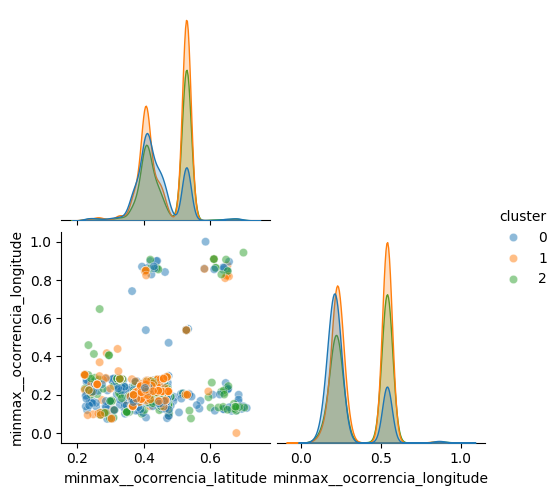

In [163]:
columns_analysis = ["minmax__ocorrencia_latitude", "minmax__ocorrencia_longitude"]

from auxiliary_functions import pairplot

pairplot(df_clustered, columns_analysis, hue_column="cluster")

In [164]:
list(df_acidentes_aero)

['ocorrencia_classificacao',
 'ocorrencia_saida_pista',
 'aeronave_tipo_veiculo',
 'aeronave_motor_tipo',
 'aeronave_motor_quantidade',
 'aeronave_tipo_operacao',
 'aeronave_nivel_dano',
 'periodo',
 'ocorrencia_latitude',
 'ocorrencia_longitude',
 'cluster']

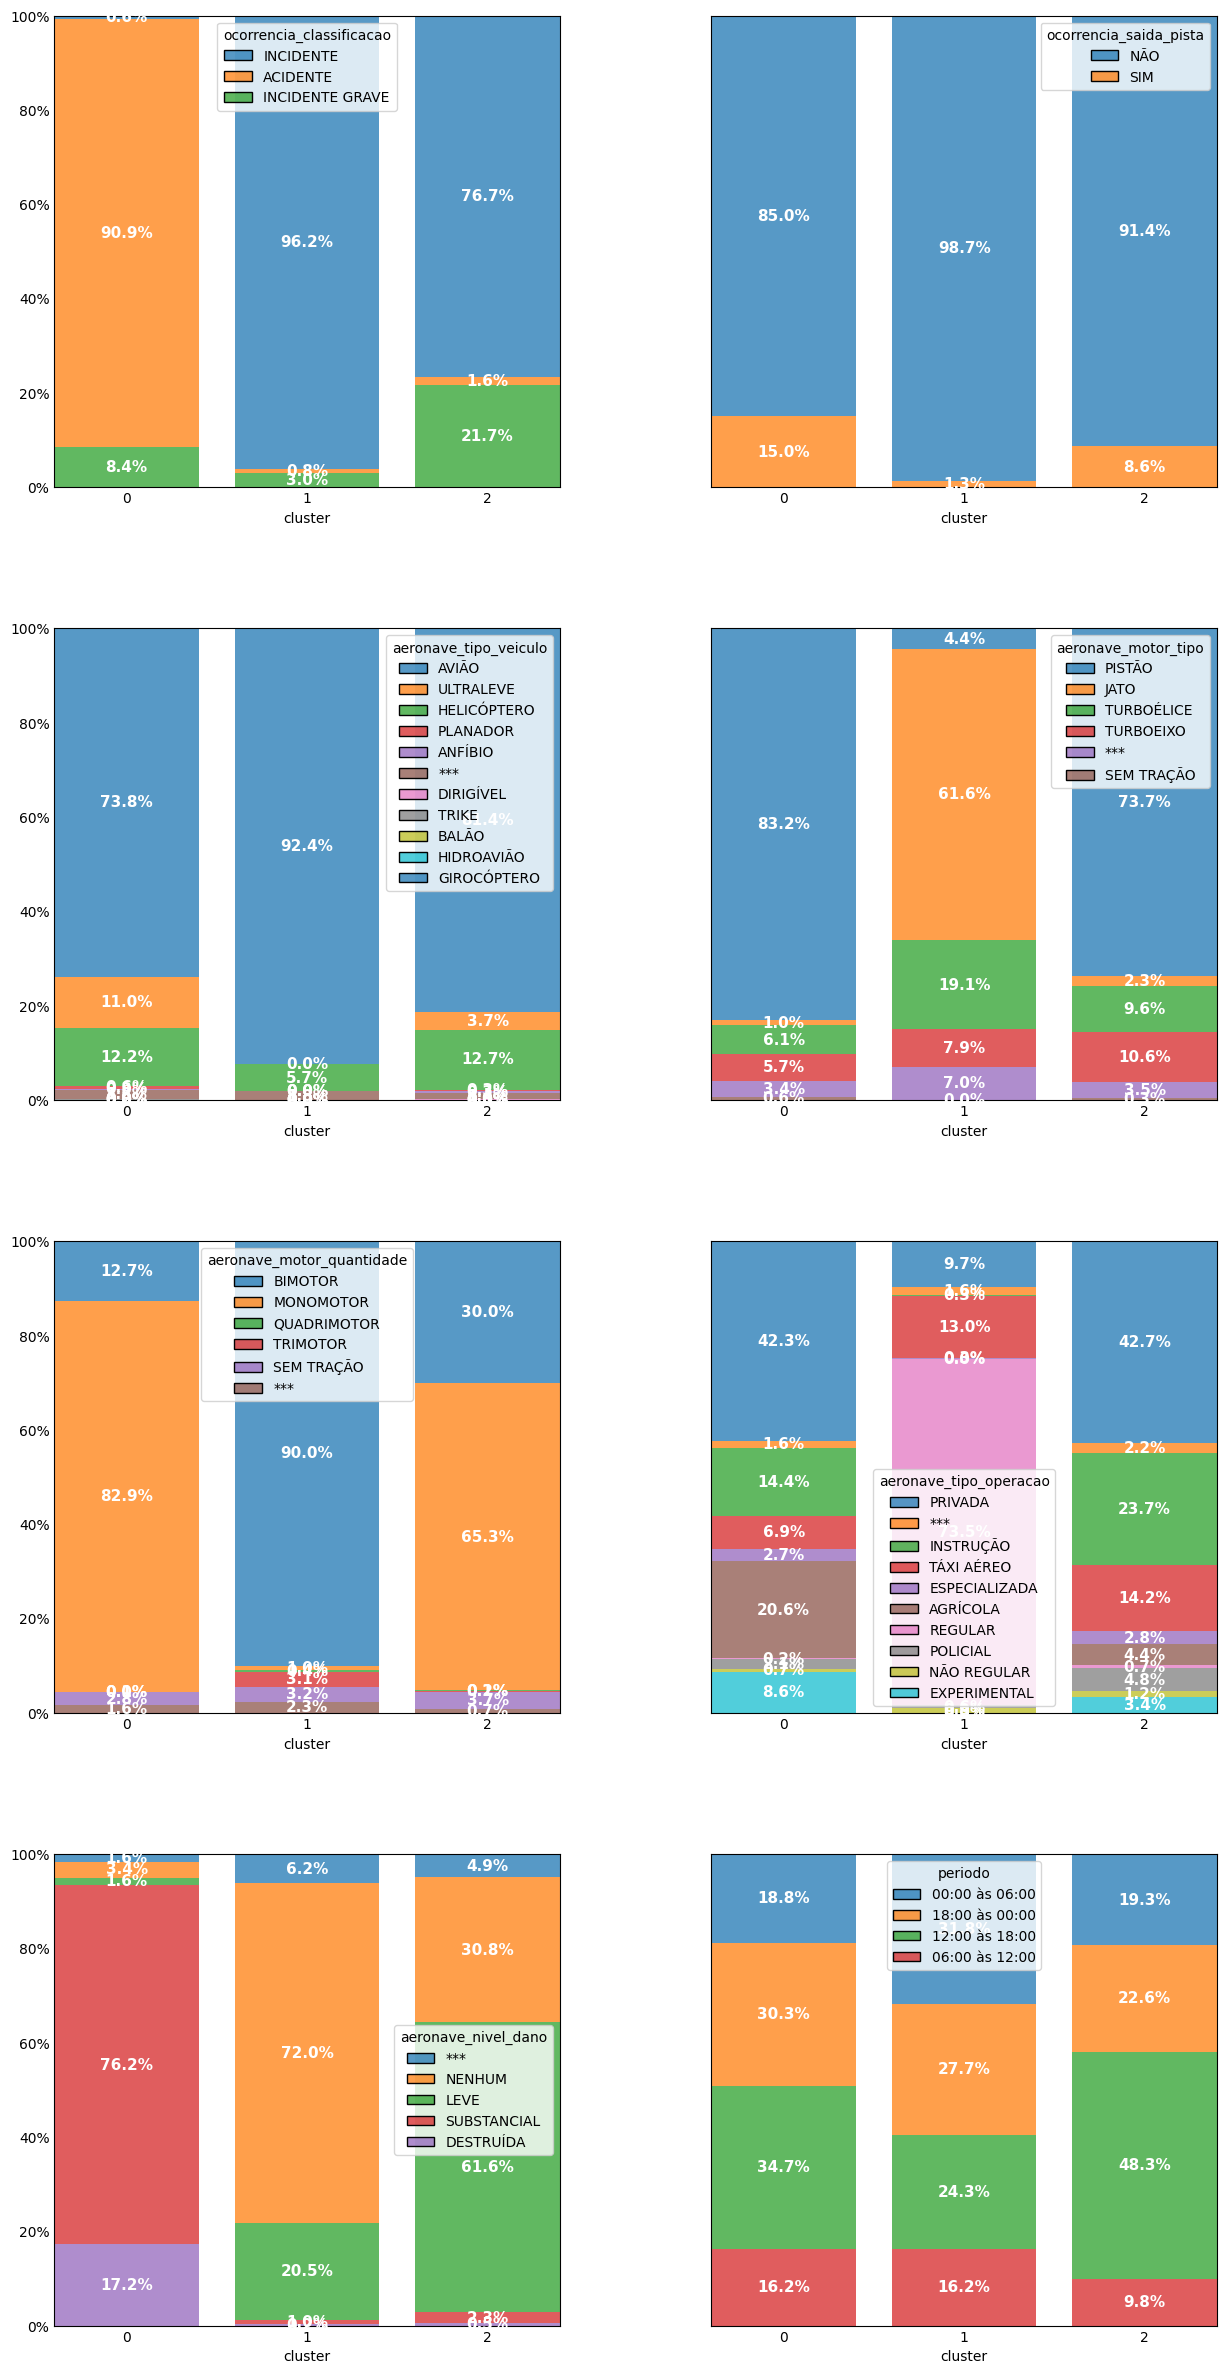

In [165]:
columns2 = [
 'ocorrencia_classificacao',
 'ocorrencia_saida_pista',
 'aeronave_tipo_veiculo',
 'aeronave_motor_tipo',
 'aeronave_motor_quantidade',
 'aeronave_tipo_operacao',
 'aeronave_nivel_dano',
 'periodo',  
]

from auxiliary_functions import plot_columns_percent_by_cluster

plot_columns_percent_by_cluster(
    dataframe=df_acidentes_aero,
    columns=columns2,
    rows_cols=(4, 2),
    figsize=(15, 30),
    column_cluster="cluster",    
)

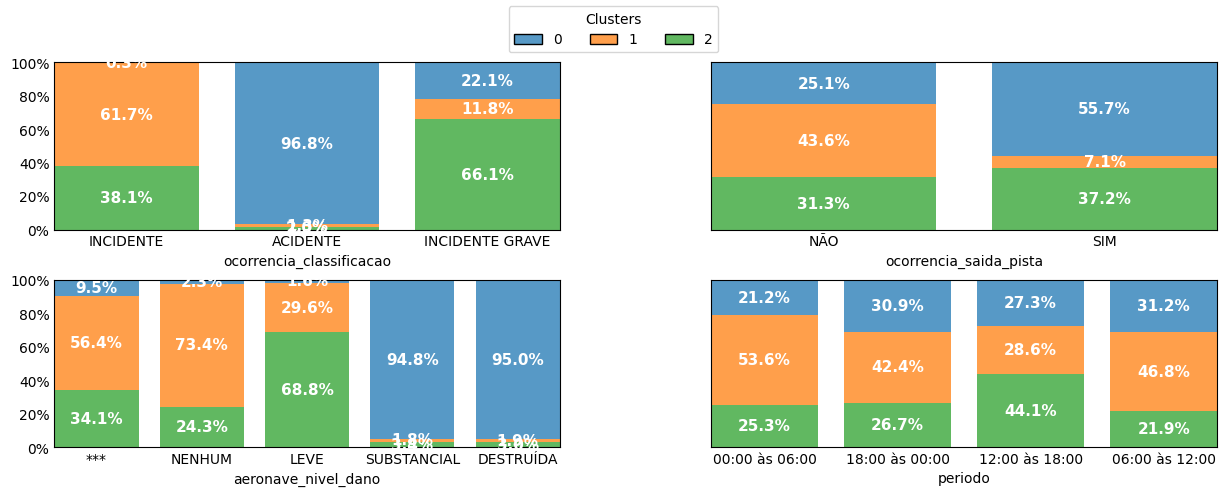

In [166]:
columns2 = [
 'ocorrencia_classificacao',
 'ocorrencia_saida_pista',
 'aeronave_nivel_dano',
 'periodo', 
]

from auxiliary_functions import plot_columns_percent_hue_cluster

plot_columns_percent_hue_cluster(
    dataframe=df_acidentes_aero,
    columns=columns2,
    rows_cols=(2, 2),
    figsize=(15, 5),
    column_cluster="cluster", 
    palette='tab10'
)

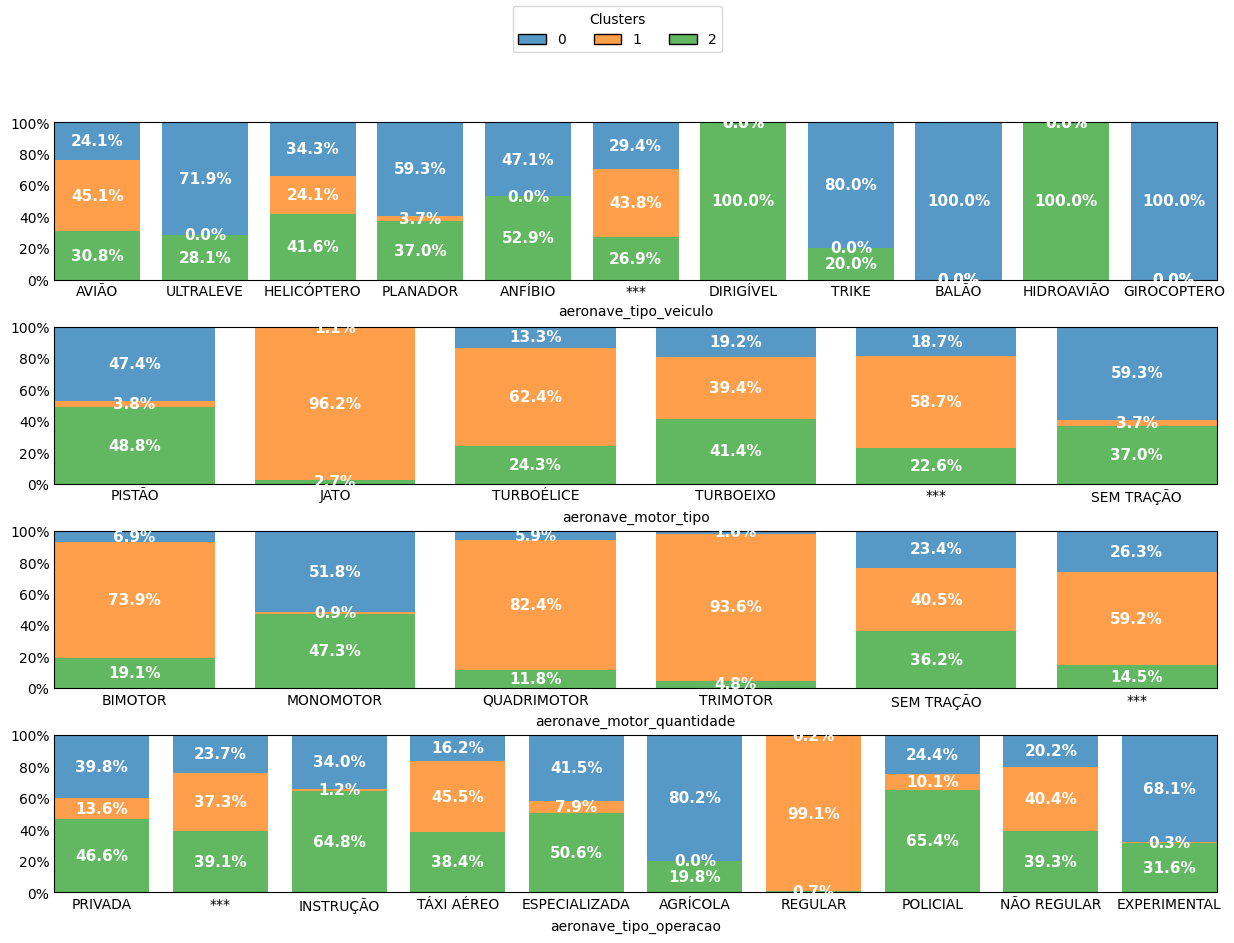

In [167]:
columns2 = [
 'aeronave_tipo_veiculo',
 'aeronave_motor_tipo',
 'aeronave_motor_quantidade',
 'aeronave_tipo_operacao',
]

from auxiliary_functions import plot_columns_percent_hue_cluster

plot_columns_percent_hue_cluster(
    dataframe=df_acidentes_aero,
    columns=columns2,
    rows_cols=(4, 1),
    figsize=(15, 10),
    column_cluster="cluster",      
)

Análise dos Clusters:
- Cluster_0
    - Acidente
    - Dano grave
    - Alta saída da pista
    - Média nos quatro períodos
    - Ultra-leve
    - Planador
    - Trike
    - Balão
    - Girocoptero
    - Sem tração
    - Monomotor
    - Agrícola
    - Experimental

- Cluster_1
    - Incidente
    - Dano nenhum
    - Média saída da pista
    - Madrugada e manhã
    - Avião
    - Jato
    - Turboélice
    - Bimotor
    - Trimotor
    - Quadrimotor
    - Regular

- Cluster_2
    - Incidente grave
    - Dano leve
    - Baixa saída da pista
    - Período da tarde
    - Anfíbio
    - Dirigível
    - Hidroavião
    - Pistao
    - Monomotor
    - Instrução
    - Especializada
    - Policial

In [168]:
pipeline

Pipeline(steps=[('pca', PCA(n_components=2, random_state=42)),
                ('clustering',
                 KMeans(n_clusters=3, n_init=10, random_state=42))])

In [169]:
pipeline[:-1]

Pipeline(steps=[('pca', PCA(n_components=2, random_state=42))])

In [170]:
pipeline[:-1].get_feature_names_out()

array(['pca0', 'pca1'], dtype=object)

In [171]:
df_pca = pd.DataFrame(
    pipeline[:-1].fit_transform(df_acidentes_aero_trans),
    columns=pipeline[:-1].get_feature_names_out()
)

df_pca.head()

,pca0,pca1
0,-0.148379,0.194488
1,0.401131,0.098900
2,-0.875988,-0.234266
3,0.533605,0.240727
4,-0.516211,-0.077001


In [172]:
centroids = pipeline["clustering"].cluster_centers_
centroids

array([[ 1.29277597, -0.51099239],
       [-1.11175315, -0.16981389],
       [ 0.32082392,  0.65959418]])

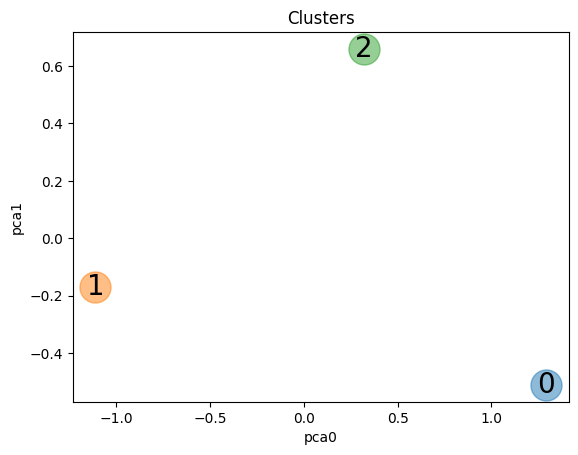

In [173]:
from auxiliary_functions import plot_clusters_2D

plot_clusters_2D(
    dataframe=df_pca,
    columns=df_pca.columns,
    n_colors=3,
    centroids=centroids
)

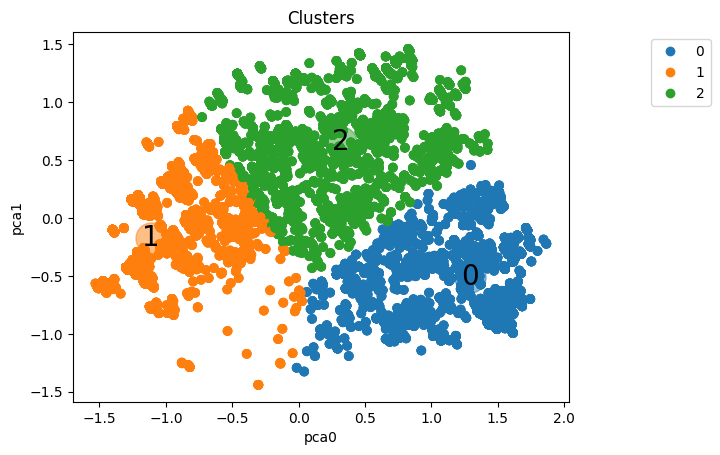

In [174]:
plot_clusters_2D(
    dataframe=df_pca,
    columns=df_pca.columns,
    n_colors=3,
    centroids=centroids,
    show_points=True,
    column_clusters=df_clustered["cluster"]
)

In [175]:
df_clustered = pd.concat([df_acidentes_aero, df_clustered], axis=1)

In [176]:
df_clustered.head()

,ocorrencia_classificacao,ocorrencia_saida_pista,aeronave_tipo_veiculo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_tipo_operacao,aeronave_nivel_dano,periodo,ocorrencia_latitude,ocorrencia_longitude,cluster,one-hot__ocorrencia_classificacao_ACIDENTE,one-hot__ocorrencia_classificacao_INCIDENTE,one-hot__ocorrencia_classificacao_INCIDENTE GRAVE,one-hot__ocorrencia_saida_pista_NÃO,one-hot__ocorrencia_saida_pista_SIM,one-hot__aeronave_tipo_veiculo_***,one-hot__aeronave_tipo_veiculo_ANFÍBIO,one-hot__aeronave_tipo_veiculo_AVIÃO,one-hot__aeronave_tipo_veiculo_BALÃO,one-hot__aeronave_tipo_veiculo_DIRIGÍVEL,one-hot__aeronave_tipo_veiculo_GIROCÓPTERO,one-hot__aeronave_tipo_veiculo_HELICÓPTERO,one-hot__aeronave_tipo_veiculo_HIDROAVIÃO,one-hot__aeronave_tipo_veiculo_PLANADOR,one-hot__aeronave_tipo_veiculo_TRIKE,one-hot__aeronave_tipo_veiculo_ULTRALEVE,one-hot__aeronave_motor_tipo_***,one-hot__aeronave_motor_tipo_JATO,one-hot__aeronave_motor_tipo_PISTÃO,one-hot__aeronave_motor_tipo_SEM TRAÇÃO,one-hot__aeronave_motor_tipo_TURBOEIXO,one-hot__aeronave_motor_tipo_TURBOÉLICE,one-hot__aeronave_motor_quantidade_***,one-hot__aeronave_motor_quantidade_BIMOTOR,one-hot__aeronave_motor_quantidade_MONOMOTOR,one-hot__aeronave_motor_quantidade_QUADRIMOTOR,one-hot__aeronave_motor_quantidade_SEM TRAÇÃO,one-hot__aeronave_motor_quantidade_TRIMOTOR,one-hot__aeronave_tipo_operacao_***,one-hot__aeronave_tipo_operacao_AGRÍCOLA,one-hot__aeronave_tipo_operacao_ESPECIALIZADA,one-hot__aeronave_tipo_operacao_EXPERIMENTAL,one-hot__aeronave_tipo_operacao_INSTRUÇÃO,one-hot__aeronave_tipo_operacao_NÃO REGULAR,one-hot__aeronave_tipo_operacao_POLICIAL,one-hot__aeronave_tipo_operacao_PRIVADA,one-hot__aeronave_tipo_operacao_REGULAR,one-hot__aeronave_tipo_operacao_TÁXI AÉREO,one-hot__aeronave_nivel_dano_***,one-hot__aeronave_nivel_dano_DESTRUÍDA,one-hot__aeronave_nivel_dano_LEVE,one-hot__aeronave_nivel_dano_NENHUM,one-hot__aeronave_nivel_dano_SUBSTANCIAL,one-hot__periodo_00:00 às 06:00,one-hot__periodo_06:00 às 12:00,one-hot__periodo_12:00 às 18:00,one-hot__periodo_18:00 às 00:00,minmax__ocorrencia_latitude,minmax__ocorrencia_longitude,cluster
0,INCIDENTE,NÃO,AVIÃO,PISTÃO,BIMOTOR,PRIVADA,***,00:00 às 06:00,0.0,0.0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.528177,0.537901,2
1,INCIDENTE,NÃO,AVIÃO,PISTÃO,MONOMOTOR,PRIVADA,NENHUM,18:00 às 00:00,0.0,0.0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.528177,0.537901,2
2,INCIDENTE,NÃO,AVIÃO,JATO,BIMOTOR,***,***,18:00 às 00:00,0.0,0.0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.528177,0.537901,1
3,INCIDENTE,NÃO,AVIÃO,PISTÃO,MONOMOTOR,INSTRUÇÃO,***,00:00 às 06:00,0.0,0.0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.528177,0.537901,2
4,INCIDENTE,NÃO,AVIÃO,PISTÃO,BIMOTOR,TÁXI AÉREO,NENHUM,18:00 às 00:00,0.0,0.0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.528177,0.537901,1


In [177]:
df_clustered.to_csv("arquivos_tratados/df_acidentes_aero_clustered.csv", index=False)

In [178]:
# salva o modelo de geração de clusters em arquivo .pkl
import joblib
joblib.dump(kmeans_cenipa, "modelos/kmeans_cenipa_acidentes_aero.pkl")

['modelos/kmeans_cenipa_acidentes_aero.pkl']